In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df = pd.read_csv('Desafio - Time de Projetos e Dados - Dados - Questão 2.csv')
df1 = pd.read_csv('Desafio - Time de Projetos e Dados - Dados - Questão 1 (1).csv')
df.head()

,cod_Loja,data_compra,inicio,termino,Loja,cod_Produto,produto,EAN,Valor Unitário Sem Imposto,quantidade,valor_total,Impostos,Dinheiro de Volta (Aplicado direto no total)
0,410,2019-07-05 10:30:41,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,"R$ 3,331.29",R$ 376.29,45.0
1,410,2019-07-05 11:58:18,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,"R$ 3,331.29",R$ 376.29,45.0
2,410,2019-07-05 14:06:58,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,"R$ 3,331.29",R$ 376.29,45.0
3,410,2019-07-05 14:50:06,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,"R$ 3,331.29",R$ 376.29,45.0
4,410,2019-07-05 16:04:56,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,3,"R$ 9,993.87","R$ 1,128.87",135.0


In [21]:
df.dtypes

cod_Loja                                          int64
data_compra                                      object
inicio                                           object
termino                                          object
Loja                                             object
cod_Produto                                       int64
produto                                          object
EAN                                               int64
Valor Unitário Sem Imposto                        int64
quantidade                                        int64
valor_total                                      object
Impostos                                         object
Dinheiro de Volta (Aplicado direto no total)    float64
dtype: object

In [25]:
# Alteram os nomes da coluna
df.rename(columns = {'Dinheiro de Volta (Aplicado direto no total)' : 'Dinheiro de Volta','Valor Unitário Sem Imposto':'Valor sem Impostos'},inplace = True)
df.dtypes

cod_Loja                int64
data_compra            object
inicio                 object
termino                object
Loja                   object
cod_Produto             int64
produto                object
EAN                     int64
Valor sem Impostos      int64
quantidade              int64
valor_total            object
Impostos               object
Dinheiro de Volta     float64
dtype: object

In [65]:
# Converter o Valor do produto de object para float
def converteValor_Total(lista):
    i = 0
    lista = []
    while (i < len(df['valor_total'])):
           lista.append(df['valor_total'][i].replace('R$','').replace(',',''))
           i += 1
    return lista
# Calcular a taxa de CASHBACK em cima do produto

df_Valor_total = pd.to_numeric(converteValor_Total(df['valor_total']))
df_volta = df['Dinheiro de Volta']
def DinheiroVolta(volta,valor,posicao):
    
    taxa = (volta[posicao] / valor[posicao]) * 100    
    return taxa

# calcula a porcentagem de um valor de cachback a partir de uma posição, ex.5
Taxa_volta = DinheiroVolta(df_volta,df_Valor_total,5)

print(f'A taxa de cashback em cima do produto é constante e equivalente a {round(Taxa_volta,2)}%')

A taxa de cashback em cima do produto é constante e equivalente a 1.35%


In [71]:
df_CashBack = pd.DataFrame([df['valor_total'],df['Dinheiro de Volta']]).T

df_CashBack.rename(columns = {'valor_total':'Valor Total', 'Dinheiro de Volta': 'CashBack'},inplace = True)
df_CashBack

,Valor Total,CashBack
0,"R$ 3,331.29",45.0
1,"R$ 3,331.29",45.0
2,"R$ 3,331.29",45.0
3,"R$ 3,331.29",45.0
4,"R$ 9,993.87",135.0
...,...,...
894,"R$ 3,331.29",45.0
895,"R$ 3,331.29",45.0
896,"R$ 9,993.87",135.0
897,"R$ 3,331.29",45.0


In [77]:
# Vendedores que mais venderam 
df_vendasVendedor = df1['nome']
df_vendasVendedor.value_counts()

MARIA       440
AUTO        381
PATRICIA    190
ANA         190
JOSE        172
           ... 
ALVES        17
GOMEZ        17
MEDEIROS     17
BEZERRA      17
TEIXEIRA     17
Name: nome, Length: 510, dtype: int64

In [84]:
# Tabela com a relação dos vendedores do seu produto Qst1
df_vendasPorVendedor = pd.DataFrame([df1['Tipo de Mercadoria'],df_vendasVendedor]).T
df_vendasPorVendedor

,Tipo de Mercadoria,nome
0,SPLIT 8501 À 10000,ANDERSON
1,SPLIT INV 8501À10000,RAIMUNDO
2,SPLIT ACIMA DE 30000,ROSILANE
3,SPLIT 10001 À 18000,SANDRA
4,SPLIT 18001 À 30000,JAMERSON
...,...,...
13872,HIPOGLICEMI ORAL REF,SOARES
13873,ANTIHELMÍNTICO REF,SANTANA
13874,ANTIVERTIGINOSO REF,SALES
13875,ESTIMULANTE REF,AURELIANO


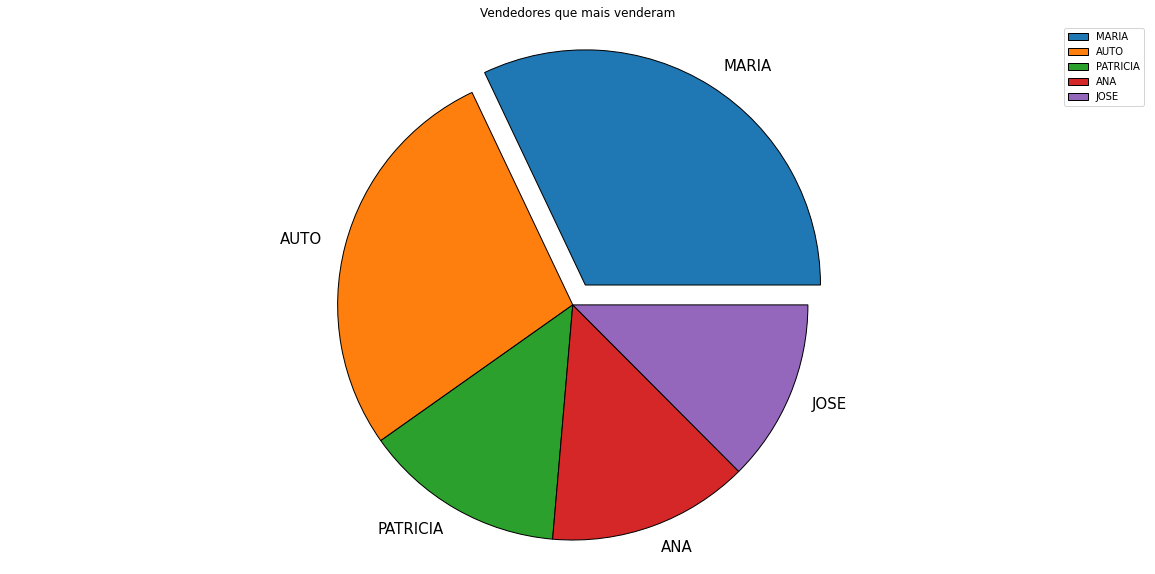

In [109]:
# Os 5 vendedores que mais venderam
count = df1["nome"].value_counts().head(5).values
dev = df1["nome"].value_counts().head(5).index
plt.figure(figsize = (45, 10))

plt.xlabel("Vendedor")
plt.title("Vendedores que mais venderam")
plt.subplot(1, 2, 2)
plt.pie(count, 
        labels = list(dev),  
        
        labeldistance = 1.1,
        explode = [.1, 0, 0, 0,0],
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 15}, 
        )
plt.axis("equal")
plt.title("Vendedores que mais venderam")
plt.legend()

In [102]:
df_vendasPorVendedor.value_counts()

Tipo de Mercadoria   nome    
SPLIT 10001 À 18000  AUTO        5
CAFETEIRA            ANA         4
TV LED DE 40" À 43"  AUTO        4
PROTET SOLAR FACIAL  MARIA       4
MULTIFUNÇÃO          MARIA       4
                                ..
COIFA DE ILHA        TATIANE     1
                     TRAYS       1
                     WEMERSON    1
COIFA DE PAREDE      ALEX        1
ÔMEGA 3 E 6          VALBNER     1
Length: 13561, dtype: int64

In [112]:

# Produtos vendidos da lista2 Qst2
df_maisVendido = df['produto'].value_counts()
df_maisVendido.head() 

Smart Pro    612
Smart Med    287
Name: produto, dtype: int64

In [120]:
# o produto mais vendido
def Produto(target,lista):
    produto_vendido = 0
    for palavra in lista:
        if (palavra == target):
            produto_vendido += 1
    return produto_vendido

MaisVendido = Produto('Smart Pro', df['produto'])
print(MaisVendido)


612


<Figure size 720x576 with 0 Axes>

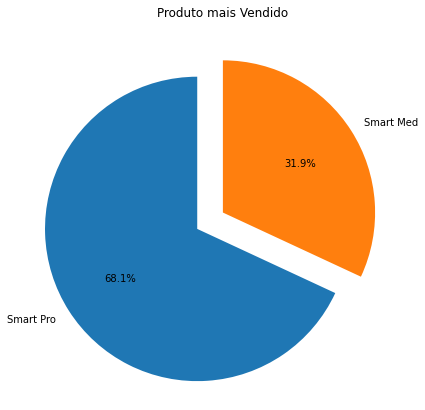

In [129]:
total = df['produto'].count()
# Gráfico dos produtos mais vendidos

MenosVendido = total  - MaisVendido
# gráfico da porcentagem de devoluções que foram registrados
plt.figure(figsize = (10, 8))
rotulo = ('Smart Pro', 'Smart Med')
vendas = (MaisVendido,MenosVendido)
explode = (0.2,0)
plt.figure(figsize =(7,7))
plt.pie(x = vendas, labels = rotulo, explode = explode, autopct = '%1.1f%%', startangle = 90)
plt.title("Produto mais Vendido")
plt.show()